### Predicting Bank Customer Term Deposit Subscription

#### Load dataset

In [23]:
import pandas as pd

df_data = pd.read_csv('../datasets/bank-full.csv', delimiter=';')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Check the column of numerical and categorical value

In [14]:
# Import numpy
import numpy as np

# Separate numerical and categorical columns
numerical_columns = df_data.select_dtypes(include=np.number).columns.tolist()
categorical_columns = df_data.select_dtypes(include='object').columns.tolist()

# Print result
print("Numerical Features:", numerical_columns)
print("Categorical Features:", categorical_columns)


Numerical Features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


#### Visualizing the Distribution of Numerical Features

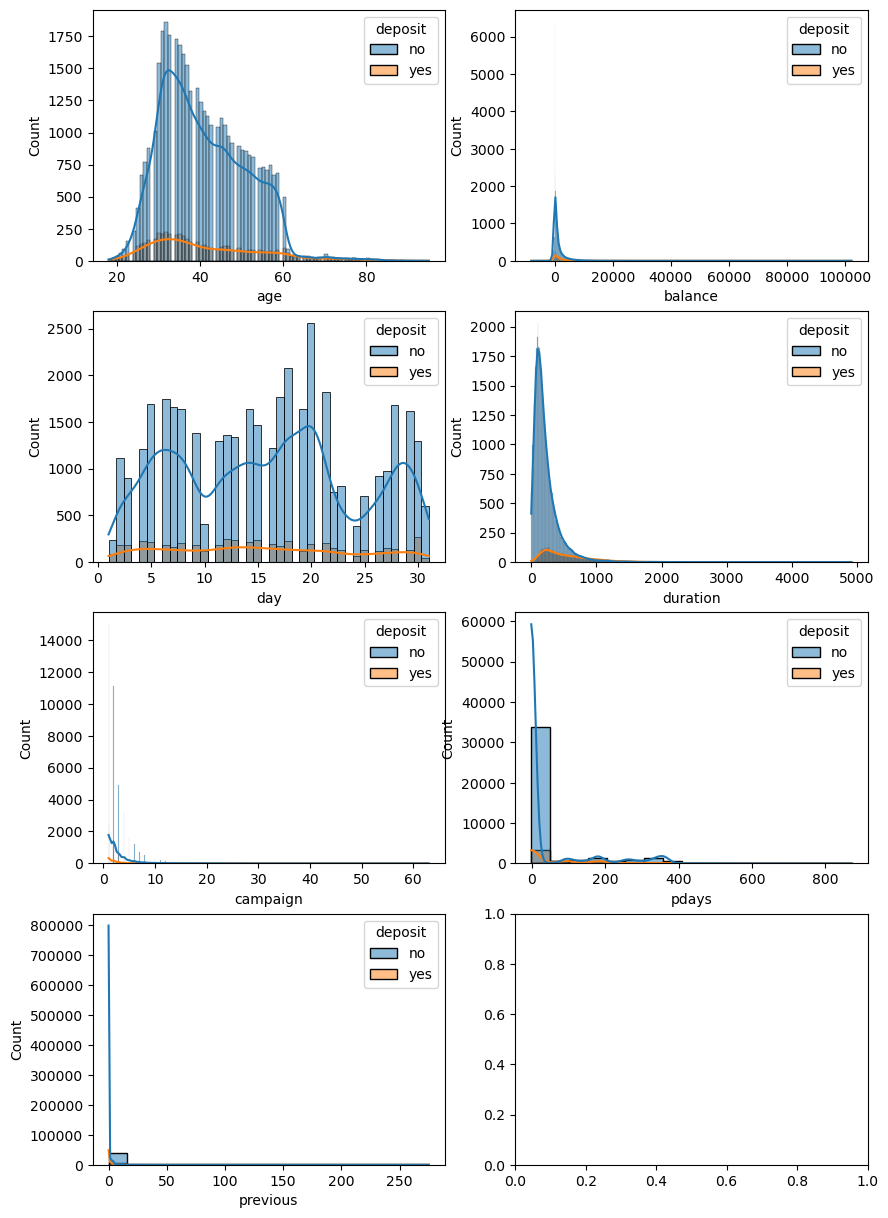

In [15]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Plot distribution for each feature
fig, axes = plt.subplots(4, 2, figsize=(10, 15))

for ax, name in zip(axes.flatten(), numerical_columns):
    sns.histplot(data=df_data, x=name, hue="deposit", kde=True, palette='tab10', ax=ax)



From the results shown in the histogram, we observed that the features **balance** (account balance), **pdays** (number of days since last contact), **campaign** (number of contacts during the current campaign), and **previous** (number of contacts before the current campaign) all exhibit significant **right-skewed distributions**.

These skewed values may affect the model's ability to make accurate predictions.\
Therefore, we will use **box plots** to further analyze the distribution of these features.\
Through box plot visualization, we can clearly observe the range of data values and whether there are extreme outliers.\
This will help us decide whether further **data preprocessing or outlier removal** is needed to improve the model's predictive performance.

#### Plotting Boxplots for Feature Skewness

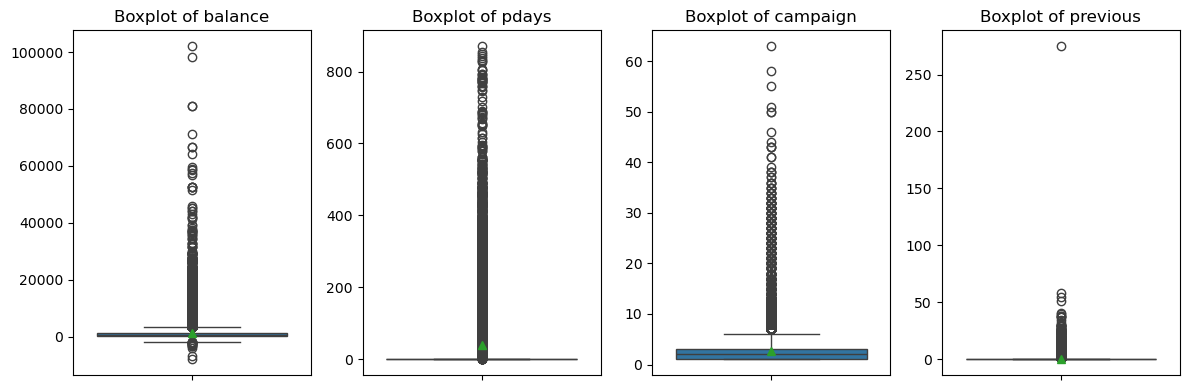

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for skewness check
x_feature_names = ['balance', 'pdays', 'campaign', 'previous']
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

for i, feature in enumerate(x_feature_names):
    sns.boxplot(y=df_data[feature], ax=axes[i], showmeans=True)
    axes[i].set_title(f"Boxplot of {feature}")
    axes[i].set_ylabel('')  # Hide y-axis label

plt.tight_layout()
plt.show()


#### Handling Outliers

In [24]:
import pandas as pd

# Function to remove outliers
def remove_outliers(df, numerical_columns):
    for column in numerical_columns:
        mean = df[column].mean()
        std = df[column].std()
        df = df[(df[column] >= mean - 3 * std) & (df[column] <= mean + 3 * std)]
    return df

# Remove outliers
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
df_data = remove_outliers(df_data, numerical_columns)


**Standard Deviation Thresholds**

-   **1.5× Standard Deviation**:\
    Sometimes used to identify mild outliers. Particularly useful when the data distribution is relatively tight.

-   **2× Standard Deviation**:\
    Under a normal distribution, about **95% of data** falls within ±2 standard deviations from the mean. This is a **common threshold** to determine whether a value is abnormal.

-   **3× Standard Deviation**:\
    Under a normal distribution, about **99.7% of data** falls within ±3 standard deviations from the mean.\
    Any value beyond this range is often regarded as an **extreme outlier**.

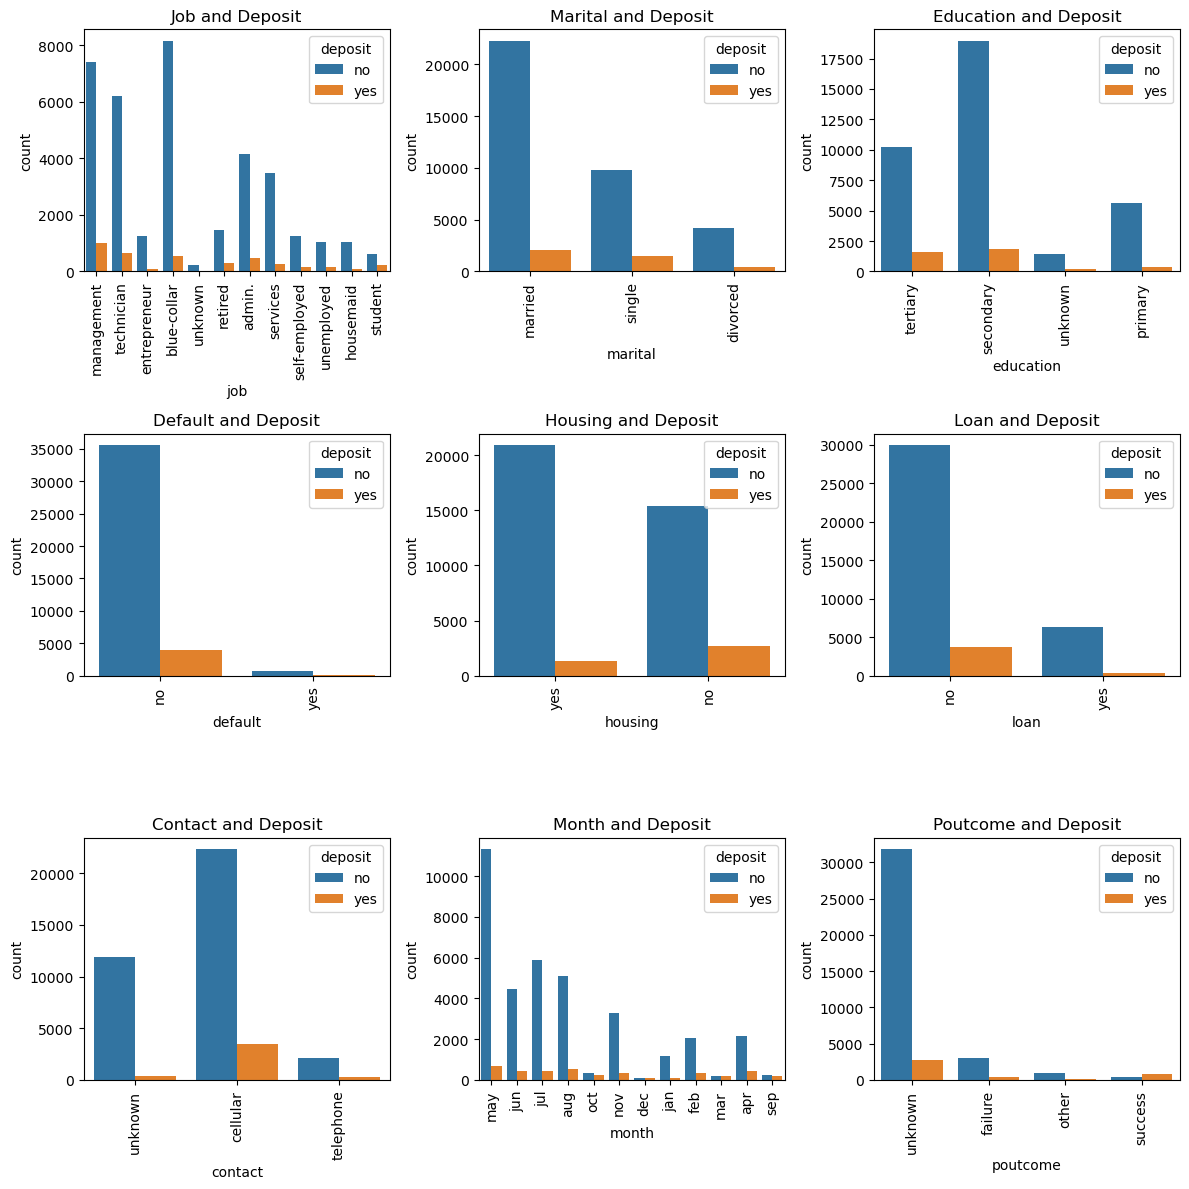

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Plot countplots
for ax, name in zip(axes.flatten(), categorical_columns):
    sns.countplot(data=df_data, x=name, hue='deposit', palette='tab10', ax=ax)
    ax.set_title(f"{name.capitalize()} and Deposit")
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

From the visualization results of categorical data, we can observe that different features significantly affect whether customers are likely to subscribe to a term deposit.\
For example, customers with `higher levels of education`, those `who use mobile phones` more frequently, and those who were `previously contacted in a successful marketing campaign` tend to have a higher subscription rate.\
In contrast, `customers with housing loans` are less likely to subscribe.

These observations help us understand the behavioral tendencies of different customer groups and provide valuable insights to optimize future marketing strategies.

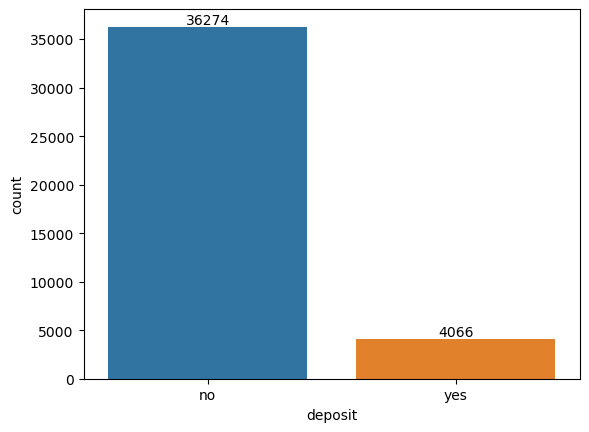

In [25]:
ax = sns.countplot(data=df_data, x='deposit', hue='deposit', palette='tab10')
for container in ax.containers:
    ax.bar_label(container)

#### Data cleaning

In [26]:
from sklearn.preprocessing import OrdinalEncoder

# Define categorical ordinal
custom_categories = [
    ['primary', 'secondary', 'tertiary', 'unknown'], 
    ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
]

# Define column ordinal
custom_columns = ['education', 'month']

ordinal_encoder_custom = OrdinalEncoder(categories=custom_categories)
df_data[custom_columns] = ordinal_encoder_custom.fit_transform(df_data[custom_columns])

for col, categories in zip(custom_columns, ordinal_encoder_custom.categories_):
    print('f{col} encoded order: {categories}')


f{col} encoded order: {categories}
f{col} encoded order: {categories}


In [27]:
auto_columns = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']
ordinal_encoder_auto = OrdinalEncoder()
df_data[auto_columns] = ordinal_encoder_auto.fit_transform(df_data[auto_columns])

for col, categories in zip(auto_columns, ordinal_encoder_auto.categories_):
    print(f'{col} ordinal: {list(categories)}')

job ordinal: ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']
marital ordinal: ['divorced', 'married', 'single']
default ordinal: ['no', 'yes']
housing ordinal: ['no', 'yes']
loan ordinal: ['no', 'yes']
contact ordinal: ['cellular', 'telephone', 'unknown']
poutcome ordinal: ['failure', 'other', 'success', 'unknown']


In [28]:
# Convert the target to value 0 and 1
print(df_data['deposit'].unique())
df_data['deposit'] = (df_data['deposit'] == 'no').astype(int)

['no' 'yes']


In [29]:
df_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,4.0,261,1,-1,0,3.0,1
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,4.0,151,1,-1,0,3.0,1
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,4.0,76,1,-1,0,3.0,1
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,4.0,92,1,-1,0,3.0,1
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,4.0,198,1,-1,0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,8.0,2.0,2.0,0.0,113,0.0,0.0,0.0,17,10.0,266,1,-1,0,3.0,0
45205,25,9.0,2.0,1.0,0.0,505,0.0,1.0,0.0,17,10.0,386,2,-1,0,3.0,0
45206,51,9.0,1.0,2.0,0.0,825,0.0,0.0,0.0,17,10.0,977,3,-1,0,3.0,0
45207,71,5.0,0.0,0.0,0.0,1729,0.0,0.0,0.0,17,10.0,456,2,-1,0,3.0,0


#### Splitting the Dataset into Training and Test Sets

In [30]:
from sklearn.model_selection import train_test_split

# Define feature name list
x_feature_names = ['age', 'job', 'marital', 'education', 'default', 'balance',
                   'housing', 'loan', 'contact', 'day', 'month', 'duration',
                   'campaign', 'pdays', 'previous', 'poutcome']

# Extract feature values from DataFrame
X = df_data[x_feature_names].values
y = df_data['deposit'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Shape of training set X:', X_train.shape)
print('Shape of testing set X:', X_test.shape)


Shape of training set X: (32272, 16)
Shape of testing set X: (8068, 16)


#### Building an XGBoost Classification Model

In [31]:
from xgboost import XGBClassifier

# Build XGBoost Classifier
xgb_clf = XGBClassifier(n_estimators=20, learning_rate=0.3, eval_metric='logloss')

# Train the model
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, ...)

#### Model Evaluation

In [34]:
train_accuracy = xgb_clf.score(X_train, y_train)
test_accuracy = xgb_clf.score(X_test, y_test)

print('Training Accuracy:', train_accuracy)
print('Testing Accuracy:', test_accuracy)

Training Accuracy: 0.9322632622706991
Testing Accuracy: 0.9180713931581557


In [35]:
from sklearn.metrics import classification_report

# Make predictions
y_pred = xgb_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.43      0.51       813
           1       0.94      0.97      0.96      7255

    accuracy                           0.92      8068
   macro avg       0.79      0.70      0.73      8068
weighted avg       0.91      0.92      0.91      8068



#### Model Interpretability

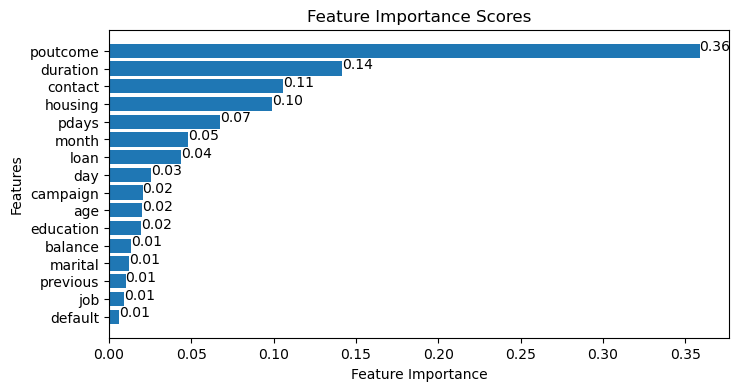

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Retrieve feature importance values
importances = xgb_clf.feature_importances_

# Get index of the feature importance
indices = np.argsort(importances)

# Plot horizontal bar chart
plt.figure(figsize=(8, 4))
bar_plot = plt.barh(range(len(x_feature_names)), importances[indices], align='center')
plt.yticks(range(len(x_feature_names)), [x_feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Scores')

# Append value on each bar
for rect in bar_plot:
    width = rect.get_width()
    plt.annotate(f'{width:.2f}', xy=(width, rect.get_y() + rect.get_height() / 2))
plt.show()


From the feature importance analysis, we can clearly see which features have a greater impact on predicting whether a bank customer will subscribe to a term deposit product.\
Below are some key insights and observations:

-   **poutcome**: The effectiveness of past marketing campaigns can influence whether the customer will accept the current term deposit offer.

-   **Duration**: This is important feature, indicating that the length of the call has a strong influence on whether the customer subscribes. The longer the call duration, the more likely the customer may subscribe.

-   **Contact**: The impact of the contact method varies. Different contact methods may influence customer decisions differently. This suggests that the way the customer is contacted plays an important role.

-   **Housing**: Whether a customer has a housing loan is also a strong indicator of their likelihood to subscribe.

